# Data Munging Part II - Filtering and Joining Datasets
This lab was adapted from # Glassdoor Jobs Data-Analysis 
https://github.com/Atharva-Phatak/Glassdoor-Jobs_Data-Analysis

In Data Munging Part I we learned how to explore our data and clean it up so that missing values are removed.

In this Data Munging Part II lab, we are going to learn how to:
1. Filter our Data
2. Sort Data 
3. Merge/Concatenate Data Sources

Recall that the point of data munging is to `wrangle` multiple data sources so that you can begin to perform data analysis on the data that you were given or scraped from the web. 

In most cases you are given a dataset and you must supplement your dataset with sources from web.

In this lab we will perform analysis of Glassdoor data

## About Glassdoor

![glass](https://upload.wikimedia.org/wikipedia/commons/e/e1/Glassdoor_logo.svg)

"Glassdoor is one of the world’s largest job and recruiting sites.

Built on the foundation of increasing workplace transparency, Glassdoor offers millions of the latest job listings, combined with a growing database of company reviews, CEO approval ratings, salary reports, interview reviews and questions, benefits reviews, office photos and more. Unlike other job sites, all of this information is shared by those who know a company best — the employees. In turn, job seekers on Glassdoor are well-researched and more informed about the jobs and companies they apply to and consider joining. This is why thousands of employers across all industries and sizes turn to Glassdoor to help them recruit and hire quality candidates at scale who stay longer. Glassdoor is available anywhere via its mobile apps."

In [ ]:
# Importing Libraries

## Q1. Write the code to import the pandas, numpy, and matplotlib.pyplot libraries

In [77]:
#importing libraries
#WRITE THEM HERE
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import datascience

!pip install datascience

%matplotlib inline

# More Data Cleaning

In the next block we are improting the libraries `plotly.express`, `gc`, `re`, and `yellowbrick`. 

## The gc python library
This library is a Garbage Collector¶. This module provides an interface to the optional garbage collector.
- It is useful for when you are working with large datasets and you pull out useful informatin from these large datasets and store them in a separate dataframe.
- Also useful if you have limited space. Some cloud servers only allow you to use a certain amount of space for free services.  (i.e. Collab, jupyter notebooks, etc.)


# The re library
This is the regular expression library. You should have already been introduced to this in a previous lab. 
Go here: https://docs.python.org/3/library/re.html for more information

# Yellowbrick library
visual analysis and diagnostic tools
you may need to install it to get it to work

`pip install yellowbrick`

In [79]:
# Note if anything isn't working in this tutorial you may need to install it. See below
!pip3 install plotly --user
!pip install seaborn
!pip3 install nltk --user
!pip install gensim --user
!pip3 install gensim
!pip install yellowbrick --user

In [51]:
import seaborn as sns
#import nltk 
#import plotly.express as px
import gc
import string
import re
#import yellowbrick

!pip install pandas plotnine --user
!pip install datascience --user

from plotnine import *
from datascience import *

pd.set_option('display.max_colwidth', 0)
pd.options.display.max_columns = 0


ModuleNotFoundError: No module named 'plotnine'

## Q2. Write the code to use pandas to load the csv files Data_Job_NY.csv, Data_Job_SF.csv, Data_Job_TX.csv, and Data_Job_WA.csv into dataframes.
Name the dataframes `ny_df`, `sf_df`, `tx_df`, and `wa_df`

Remember that your csv files should be located in the data directory

In [ ]:
# Load the datasets NY, SF, TX, WA
# WRITE CODE HERE

ny_df = pd.read_csv("Data_Job_NY.csv")
sf_df = pd.read_csv("Data_Job_SF.csv")
tx_df = pd.read_csv("Data_Job_TX.csv")
wa_df = pd.read_csv("Data_Job_WA.csv")

## Q3. Write the code to print out the count, mean, std, min, and max of all of the datasets loaded. 
Note: You'll have to run the code in a separate cell for each of the datasets

In [ ]:
ny_df.describe()

In [ ]:
sf_df.describe()

In [ ]:
tx_df.describe()

In [ ]:
wa_df.describe()

## Q4. Write the code to print the first 2 rows of the NY dataset

In [ ]:
ny_df.iloc[:2]

## Q5. Write the code to print the name of the columns for only one of the dataframes

Note: the data was scrapted from glassdoor and will have the same column information for each dataframe loaded

In [ ]:
# Print column informaiton here
list(ny_df.columns)

## ***Information About the columns present in the Data***

1. The 12 columns in the datasets:
    * ***Job_title*** : The title of job which you are applying to
    * ***Company*** : Company name
    * ***State/City*** : State/City in which the companies job posting is listed.
    * ***Min_Salary*** : Minimum yearly salary in USD.
    * ***Max_Salary*** : Maximum yearly salary in USD.
    * ***Job_Desc*** : The job description which included skills,requirements,etc
    * ***Industry*** : The industry in which the company works.
    * ***Date_posted*** : The date  on which the job was posted on glassdoor
    * ***Valid_until*** : The last date of applying to the job.
    * ***Job_Type*** : Type of job full-time , part-time,etc.


### Sorting column names

You can sort the names of the columns alphabettically using the below `sorted` function
`sorted(df)` where df is the name of the dataframe

## Q6. Write the code to sort the column names alphabetically

In [ ]:
# using sorted() method 
sorted(ny_df.columns)

# Joining OR Concatenating Dataframes
To join dataframes together use the panda function `concat`.
`pd.concat(df1, df2, df3, ..., dfn)` where pd is the panda library name and df1 is dataframe1, df2 is dataframe2, and df3 is dataframe3

In [ ]:
# Below is an example of how to concatenate the dataframes together
#Concatenating the data files

all_df = pd.concat([ny_df , sf_df , tx_df, wa_df] , axis = 0 , ignore_index = True)

# Garbage Collection
In some cases you should perform garbage collection to clear up your workspace
This is especially true when working on cloud-based systems like Collab or Jupyter notebooks

Use the `gc.collect()` function to clean up any dataframes that you don't need anymore
To do this you'll need to delete them first then call `gc.collect()`

In [ ]:
del ny_df , sf_df , tx_df ,wa_df
gc.collect()

## Q7. Write the output from the collect function below

WRITE ANSWER HERE:
102

## Q8. What do you think it means?

WRITE ANSWER HERE:
This is the number of unreachable objects found returned.

In [ ]:
print(gc.collect())

# Beginning Exploratory Data Analysis

## Q9. How many rows and columns does your all_df have? Write the code below.

In [ ]:
# WRITE CODE HERE
all_df.shape

In [ ]:
all_df.info()

# Working with Data to Sort and Filter it

Sometimes the data you are given or that you have scraped will need to be converted to another format. 

In all_df, we'll mainly we working with min_salary and max_salary

To work with these values we'll need to convert them to int

In [ ]:
#First let's convert min_salary and max_salary columns to int
all_df['Min_Salary'] = all_df['Min_Salary'].apply(lambda x : int(x))
all_df['Max_Salary'] = all_df['Max_Salary'].apply(lambda x : int(x))

# Working with Dates in Datasets
Many datasets have dates within them
To work with dates, and to sort and filter them properly you may need to work with only the month
or only the year or only the day.

Use the `calendar` library as shown below

In [ ]:
#Extracting date and day from Date_Posted : data is the format y-m-d
import calendar
all_df['Month'] = all_df['Date_Posted'].apply(lambda x : calendar.month_abbr[int(str(x).split('-')[1])]) 

In [ ]:
all_df

## Q10 Write the code to extract the date and day from Valid Until column. 
data is the format y-m-d
Name it `all_df['Valid_Month']`

In [ ]:
all_df['Valid_Month'] = all_df['Valid_until'].apply(lambda x : calendar.month_abbr[int(str(x).split('-')[1])]) 
all_df

## Converting Dates to Day
Sometimes you will need to convert a date into a given day
To do this, you can use the function created below called 
`Convert_to_Day`


In [ ]:
def Convert_to_Day(x):
    sl = x.split('-')
    
    return calendar.day_abbr[int(calendar.weekday(int(sl[0]) , int(sl[1]) , int(sl[2])))]

## Q11. Use the Convert to Day function to convert the Date_Posted and Valid_Until values to days
Print out row 105 in the dataset

In [ ]:
all_df['V_Day'] = all_df['Valid_until'].apply(lambda x : Convert_to_Day(x)) 
all_df['Day'] = all_df['Date_Posted'].apply(lambda x : Convert_to_Day(x)) 
all_df.iloc[[105]]

# Revisiting Working with Missing Data
In Data Munging Part I, we removed missing data

Sometimes you'll want to save that data for later so you can do some analysis on the erroneously provided or missing data
This is shown below

In [ ]:
# This dataset replaced missing values with -1 
# Store that data in different data frame
index_missing = all_df[(all_df['Min_Salary'] == -1)].index

#We will use this data as our test set.
test_df = all_df.iloc[index_missing, :].reset_index(drop = True)

## Q11. Now that you have this missing data, you can now drop it from the dataframe. Write the code to do this below.
**Hint: You should use the function `drop` that follows this format
`df.drop(missing_data_index, axis=0, inplace=True)` where `df` is the dataframe
and `missing_data_index` is a list of rows to drop from the dataframe

In [52]:
index_missing

Int64Index([   0,    1,    2,    9,   12,   16,   17,   19,   20,   21,
            ...
            3289, 3292, 3293, 3295, 3296, 3300, 3301, 3302, 3303, 3304],
           dtype='int64', length=1092)

In [53]:
#for i in range(len(index_missing)):
    #test_df.drop(index_missing[i], axis=0, inplace=True)
test_df

,Job_title,Company,State,City,Min_Salary,Max_Salary,Job_Desc,Industry,Rating,Date_Posted,Valid_until,Job_Type,Month,Valid_Month,V_Day,Day
0,Plumber,Plumbing for life Inc.,NY,New York,-1,-1,Established plumbing company looking for a Plu...,NaN,NaN,2020-04-29,2020-06-07,FULL_TIME,Apr,Jun,Sun,Wed
1,Principal Incident Response Consultant,Crypsis Group,NY,New York,-1,-1,JOB DESCRIPTIONCompany background The Crypsis ...,Information Technology,4.8,2020-04-27,2020-06-07,FULL_TIME,Apr,Jun,Sun,Mon
2,Lab - Medical Technologist,Cross Country Allied,NY,New York,-1,-1,Travel Medical Technologist / MT As one of the...,Business Services,NaN,2020-05-07,2020-06-07,FULL_TIME,May,Jun,Sun,Thu
3,Mammography Technologist PRN,ONsite Mammography,NJ,West Orange,-1,-1,Do you want a flexible work schedule? Can you ...,NaN,5.0,2020-04-25,2020-06-07,FULL_TIME,Apr,Jun,Sun,Sat
4,Forward Deployed Engineer,Addepar,NY,New York,-1,-1,Addepar has the potential to make a huge swath...,Information Technology,4.3,2020-04-29,2020-06-07,FULL_TIME,Apr,Jun,Sun,Wed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,Big Data Engineer with very strong AWS,youth power technosoft LLC,VA,Reston,-1,-1,"Client - Fannie maeLocation- Reston, VAVisa - ...",NaN,NaN,2020-04-29,2020-06-06,FULL_TIME,Apr,Jun,Sat,Wed
385,"BioNexus Foundation Principal Scientist, Bioin...",ATCC,MD,Gaithersburg,-1,-1,"Overview Founded in 1925, ATCC is a non-profit...",NaN,1.0,2020-04-25,2020-06-06,FULL_TIME,Apr,Jun,Sat,Sat
386,Data Engineer with Security Clearance,GeoLogics Corporation,VA,Chantilly,-1,-1,Job Description Employment Type: Direct Hire J...,Business Services,4.2,2020-04-24,2020-06-06,FULL_TIME,Apr,Jun,Sat,Fri
387,Lead Data Engineer,LTE Networks,VA,Chantilly,-1,-1,Lead Data Engineer (GDMS) engineers a diverse ...,NaN,NaN,2020-05-01,2020-06-06,FULL_TIME,May,Jun,Sat,Fri


# Working with Duplicates
Sometimes in your dataset because it is scraped from the web, there may be duplicates
You'll need to check for these duplicates because it will impace your data analysis

In [54]:
#Check for duplicates in the data becasue our scraper was not perfect and could have scraped multiple entries
cols = [col for col in all_df.columns if col not in ['Day' , 'Month']]

#For training data 
train_series = all_df.duplicated(cols , keep = 'first')
data_df      = all_df[~train_series].reset_index(drop = True)
test_series  = test_df.duplicated(cols , keep = 'first')
test_df      = test_df[~test_series].reset_index(drop = True)

# Looking for Unique Values in your Dataframe
Sometiems you'll need to look for unique values in your dataframe 
Use the `unique` function to do this
Follows this format `df['COL_NAME'].unique()` where df is the dataframe and COL_NAME is the column name in the dataframe

In [55]:
# Find the Unique States
print(all_df['State'].unique())

['NY' 'NJ' 'CA' 'TX' 'Texas' 'VA' 'MD' 'DC' nan]


## Q12. Write the code to count the number of unique States from the previous operation. Name the variable num_states and print it

In [56]:
len(all_df['State'].unique())

9

In [57]:
#Let's explore the top 5 cites in which most job lisitngs are there
for state in all_df['State'].unique():
    print(f"State of {state}")
    print(all_df[all_df['State'] == state]['City'].value_counts()[:5])

State of NY
New York         420
Rego Park         60
Brooklyn          60
Staten Island     60
Lynbrook          30
Name: City, dtype: int64
State of NJ
Paramus          30
Jersey City      30
West New York    30
Fort Lee         30
West Orange      30
Name: City, dtype: int64
State of CA
San Francisco          435
South San Francisco    169
Menlo Park              40
San Mateo               33
Berkeley                31
Name: City, dtype: int64
State of TX
Austin         175
Dallas         102
Houston         90
Irving          58
San Antonio     53
Name: City, dtype: int64
State of Texas
Series([], Name: City, dtype: int64)
State of VA
Arlington      96
McLean         60
Springfield    58
Chantilly      54
Alexandria     46
Name: City, dtype: int64
State of MD
Gaithersburg     49
Rockville        48
Silver Spring    31
Bethesda         29
College Park     28
Name: City, dtype: int64
State of DC
Washington    194
Name: City, dtype: int64
State of nan
Series([], Name: City, dtype: int

## Q13. What city has the most job openings? Write your answer below

WRITE ANSWER HERE:

* San Fransico has the most job openings

## Q14. What city has the least job openings? What states do they occur in?

WRITE YOUR ANSWER HERE
* Releigh, Chennai, Florence has the least job openings. They occur in the states of NC, TN, KY

# Identifying and Removing Outliers
In some cases you'll have outliers in your data. 
An `outlier` is an observation that lies an abnormal distance from other values in a random sample from a population. 
Sometimes negative numbers, zero, or really large numbers can be outliers in your sample population

See your textbook Sampling from a Population https://www.inferentialthinking.com/chapters/10/2/Sampling_from_a_Population.html

In [58]:
# Dropping the states with only one
# Saving this data for later
index_outlier = all_df[(all_df['State'] =='NC') | (all_df['State'] =='TN') | (all_df['State'] =='KY')].index
all_df.drop(index_outlier , inplace = True)

# Visualizing the Data with pie charts
The below code shows how to make a pie chart for the CA

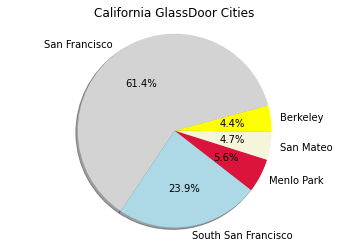

In [59]:
#Create a Pie Chart of CA and TX

max_state = ['CA' ]
for i,state in enumerate(max_state,1):
    cities = all_df[all_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    counts = all_df[all_df["State"] == state]['City'].value_counts()[:5].to_list()

my_colors  = ['lightgray','lightblue','crimson', 'beige', 'yellow']
my_explode = (0, 0.1, 0)

plt.pie(counts,labels=cities,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('California GlassDoor Cities')
plt.axis('equal')
plt.show()   

## Q15. Write the code to create a pie chart for TX. 

Add a title to your pie chart

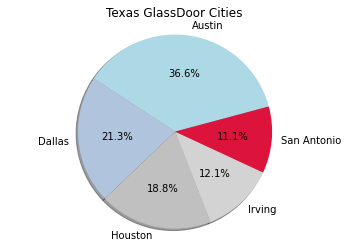

In [60]:
# Write code to create pie chart 
max_state = ['TX' ]
for i,state in enumerate(max_state,1):
    cities = all_df[all_df['State'] == state]['City'].value_counts()[:5].index.to_list()
    counts = all_df[all_df["State"] == state]['City'].value_counts()[:5].to_list()

my_colors  = ['lightblue','lightsteelblue','silver', 'lightgrey', 'crimson']
my_explode = (0, 0.1, 0)

plt.pie(counts,labels=cities,autopct='%1.1f%%',startangle=15, shadow = True, colors=my_colors)
plt.title('Texas GlassDoor Cities')
plt.axis('equal')
plt.show() 

# Using the Groupby functionality
A groupby operation involves some combination of splitting the object, 
applying a function, and combining the results. 

This can be used to group large amounts of data and compute operations on these groups.

This is shown in the example below

In [61]:
#Calculate the minimal salary for the states 
states = all_df['State'].unique().tolist()

min_sal =  all_df.groupby('State')['Min_Salary']
max_sal =  all_df.groupby('State')['Max_Salary']

min_sal.min()


State
CA      -1
DC      -1
MD      -1
NJ      -1
NY      -1
TX      -1
Texas   -1
VA      -1
Name: Min_Salary, dtype: int64

## Q16. Use the groupby function to find the minimal salary for all companies
Print this information

In [62]:
companies = all_df.groupby('Company')['Min_Salary'].apply(np.count_nonzero)
companies

Company
159 Solutions, Inc.           1
1884794                       1
1901 Group                    1
1Point Solutions Inc          1
22nd Century Technologies     2
                             ..
tekwissen                     1
vidIQ                         1
youth power technosoft LLC    1
Øptimus                       1
Øptimus Consulting            2
Name: Min_Salary, Length: 1338, dtype: int64

## Extracting Features out of Job Description 

In [63]:
#Let's look at  how the job description actually looks
x = all_df.Job_Desc[0].replace('\n\n' , '\n')
x = x.split('\n')

print(*x , sep = '\n')

Who We're Looking For: The Chief Marketing Officer (CMO) is an exempt, executive position, responsible for all marketing operations of the company including lead acquisition, sales enablement, communications, retention, and brand development. This executive leads a team of enthusiastic, analytical, and passionate marketing professionals to develop, execute, and optimize the marketing strategy. We are looking for someone with a history of brand development and proven ability to accelerate company growth leveraging the latest marketing strategies and technologies. This role goes beyond traditional marketing tactics to generate awareness, educate the consumer on the viability of our service, and in turn drive the consumer to take action and engage the brand. Principal Duties and Responsibilities: Lead the full marketing strategy and have accountability over development, execution, and optimization across all channels including paid and organic search, display, email, social, TV, radio, di

## Q17. What are some observations that you noticed about the job description column. What's the format or structure of the job description

WRITE ANSWERE HERE:
The job desciption column is a combination of paragraphs, phrases, and list for each cell. 

    
    
    
# Cleaning up HTML Artifiacts 
Sometimes you will need to clean up the data
Use the regular expression library to do that
Use the `replace` function

In [80]:
#Let's clean up the \n and remove punction marks
all_df['Job_Desc'] = all_df['Job_Desc'].replace('\n\n' , " " , regex = True)
all_df['Job_Desc'] = all_df['Job_Desc'].replace('\n' , " " , regex = True)

test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n\n' , " " , regex = True)
test_df['Job_Desc'] = test_df['Job_Desc'].replace('\n' , " " , regex = True)
#Let's remove punctuation and Stopwords

from gensim.parsing.preprocessing import remove_stopwords
def Remove_puncutations_stopwords(s):

    s = ''.join([i for i in s if i not in string.punctuation])
    s = remove_stopwords(s)
    return s

data_df['Job_Desc'] = data_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

data_df['Job_Desc'][2]
#test_df['Job_Desc'] = test_df['Job_Desc'].apply(lambda x : Remove_puncutations_stopwords(x))

ModuleNotFoundError: No module named 'gensim'

In [82]:
# Saving Data
#After you worked with some data sometimes you'll need to save it to work with later

In [83]:
all_df.to_csv("all_data.csv" , index = False)